<a href="https://colab.research.google.com/github/bipinKrishnan/tensorflow_to_pytorch/blob/master/CNN_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

## Load the pretrained model

In [ ]:
from torchvision import models

#different pretrained models in pytorch
dir(models)

In [ ]:
model = models.mobilenet_v2(pretrained=True)

In [ ]:
print(model)

## Load and preprocess the image

In [ ]:
from torchvision.transforms import transforms
import PIL.Image as Image

In [ ]:
#these transformation are required for mobilenet
#as said here:
#https://pytorch.org/hub/pytorch_vision_mobilenet_v2/

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

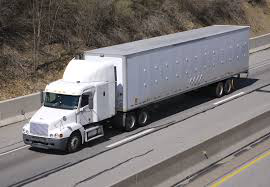

In [ ]:
# load from local storage
img_jpeg = 'truck.jpeg'

img = Image.open(img_jpeg)
img

#for loading image from url
# img_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg'
# response = requests.get(img_url)
# img = Image.open(io.BytesIO(response.content))
#img

In [ ]:
img = preprocess(img)

## Make predictions

In [ ]:
model.eval()

In [ ]:
inputs = torch.unsqueeze(img, 0)
pred = model(inputs)

In [ ]:
_, pred_class = torch.max(pred.data, 1)

## Load the labels to check the accuracy of predictions 
--> [Labels](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)

In [ ]:
import pickle
import urllib

In [ ]:
#load the label dictionary
label = pickle.load(urllib.request.urlopen('https://gist.githubusercontent.com/yrevar/6135f1bd8dcf2e0cc683/raw/d133d61a09d7e5a3b36b8c111a8dd5c4b5d560ee/imagenet1000_clsid_to_human.pkl') )

In [ ]:
label[pred_class.item()]

'trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi'